In [103]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer, classification_report
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

In [104]:
#Load the dataset into a dataframe
df = pd.read_csv('dataset.csv')

#Display the shape and first few rows of the dataset
print(f"Shape : {df.shape}\n")
print(df.head)

Shape : (4600, 58)

<bound method NDFrame.head of       word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0               0.21               0.28           0.50           0.0   
1               0.06               0.00           0.71           0.0   
2               0.00               0.00           0.00           0.0   
3               0.00               0.00           0.00           0.0   
4               0.00               0.00           0.00           0.0   
...              ...                ...            ...           ...   
4595            0.31               0.00           0.62           0.0   
4596            0.00               0.00           0.00           0.0   
4597            0.30               0.00           0.30           0.0   
4598            0.96               0.00           0.00           0.0   
4599            0.00               0.00           0.65           0.0   

      word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0       

In [105]:
#Display all the information about the dataset
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4600 non-null   float64
 1   word_freq_address           4600 non-null   float64
 2   word_freq_all               4600 non-null   float64
 3   word_freq_3d                4600 non-null   float64
 4   word_freq_our               4600 non-null   float64
 5   word_freq_over              4600 non-null   float64
 6   word_freq_remove            4600 non-null   float64
 7   word_freq_internet          4600 non-null   float64
 8   word_freq_order             4600 non-null   float64
 9   word_freq_mail              4600 non-null   float64
 10  word_freq_receive           4600 non-null   float64
 11  word_freq_will              4600 non-null   float64
 12  word_freq_people            4600 non-null   float64
 13  word_freq_report            4600 

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Label
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,...,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,0.104576,0.212922,0.280578,0.065439,0.312222,0.095922,0.114233,0.105317,0.090087,0.239465,...,0.038583,0.139061,0.016980,0.268960,0.075827,0.044248,5.191827,52.170870,283.290435,0.393913
std,0.305387,1.290700,0.504170,1.395303,0.672586,0.273850,0.391480,0.401112,0.278643,0.644816,...,0.243497,0.270377,0.109406,0.815726,0.245906,0.429388,31.732891,194.912453,606.413764,0.488669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.275500,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.382500,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.314250,0.052000,0.000000,3.705250,43.000000,265.250000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [106]:
#Number of spam and ham emails in the dataset (Label = 1 -> Spam)
Total = df.shape[0]
Spam = df['Label'].sum()
Ham = Total-Spam
print(f"Spam : {Spam} ({(Spam/Total)*100 :.2f}%)")
print(f"Ham (Non-Spam) : {Ham} ({(Ham/Total)*100 :.2f}%)")

Spam : 1812.0 (39.39%)
Ham (Non-Spam) : 2788.0 (60.61%)


In [107]:
#Separate the input and output variables
X = df.drop(['Label'], axis=1)
y = df['Label']

In [108]:
#Split the dataset into training and testing parts
X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size=0.2, random_state = 37, stratify=y)

In [122]:
#Create a pipeline for scaling the features and training the model
pipe = Pipeline([('scale', StandardScaler()), ('model', LogisticRegression(max_iter=10000))])

In [123]:
#HYPER-PARAMETER TUNING: 
param_grid = {
                'model__C': [0.01, 0.1, 1, 10, 100], #Try different values of 1/Lambda_ so that parameters are low
                'model__class_weight': [
                    {0:1, 1:1}, #Equal penalizing
                    {0:2, 1:1}, #A misclassified Ham will be penalized 2x as much as a misclassified spam
                    {0:3, 1:1}, #3x
                    {0:5, 1:1}  #5x
                ],
                'model__penalty':['l2'], #log loss
                'model__solver':['saga'] #Gradient Descent Algorithm
}

In [129]:
#I do not want a ham to be classified as spam, so the scoring is based on that
grid = GridSearchCV( pipe,
                     param_grid = param_grid,
                     scoring = {'precision_ham_scorer': make_scorer(precision_score, pos_label=0), 'f1':make_scorer(f1_score), 'precision':make_scorer(precision_score), 'recall':make_scorer(recall_score)},
                     refit = 'precision_ham_scorer',
                     return_train_score = True,
                     cv = 4,
                     n_jobs=-1,
                     verbose=1)
grid.fit(X_train, y_train)
pd.DataFrame(grid.cv_results_)

Fitting 4 folds for each of 20 candidates, totalling 80 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,param_model__class_weight,param_model__penalty,param_model__solver,params,split0_test_precision_ham_scorer,...,split3_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_train_recall,split1_train_recall,split2_train_recall,split3_train_recall,mean_train_recall,std_train_recall
0,0.201358,0.046340,0.013879,0.000810,0.01,"{0: 1, 1: 1}",l2,saga,"{'model__C': 0.01, 'model__class_weight': {0: ...",0.911263,...,0.826446,0.844842,0.011736,5,0.853860,0.840074,0.850046,0.852806,0.849196,0.005448
1,0.206809,0.042774,0.015053,0.000763,0.01,"{0: 2, 1: 1}",l2,saga,"{'model__C': 0.01, 'model__class_weight': {0: ...",0.871589,...,0.719008,0.728989,0.029286,14,0.746324,0.730699,0.743330,0.746090,0.741611,0.006409
2,0.199621,0.047702,0.014849,0.001921,0.01,"{0: 3, 1: 1}",l2,saga,"{'model__C': 0.01, 'model__class_weight': {0: ...",0.845201,...,0.652893,0.655216,0.045719,19,0.660846,0.659926,0.671573,0.653174,0.661380,0.006589
3,0.208184,0.039768,0.013438,0.000729,0.01,"{0: 5, 1: 1}",l2,saga,"{'model__C': 0.01, 'model__class_weight': {0: ...",0.804412,...,0.578512,0.569685,0.042176,20,0.573529,0.567096,0.596136,0.560258,0.574255,0.013477
4,1.034443,0.243939,0.014234,0.000109,0.10,"{0: 1, 1: 1}",l2,saga,"{'model__C': 0.1, 'model__class_weight': {0: 1...",0.930435,...,0.851240,0.876570,0.015624,4,0.896140,0.878676,0.881325,0.881325,0.884366,0.006883
5,0.906145,0.214959,0.014009,0.000972,0.10,"{0: 2, 1: 1}",l2,saga,"{'model__C': 0.1, 'model__class_weight': {0: 2...",0.900000,...,0.801653,0.817952,0.014985,9,0.827206,0.814338,0.820607,0.822447,0.821150,0.004611
6,0.872569,0.193964,0.015548,0.001655,0.10,"{0: 3, 1: 1}",l2,saga,"{'model__C': 0.1, 'model__class_weight': {0: 3...",0.883117,...,0.741047,0.744171,0.036450,13,0.780331,0.750000,0.748850,0.765409,0.761148,0.012861
7,0.888462,0.239459,0.014444,0.000991,0.10,"{0: 5, 1: 1}",l2,saga,"{'model__C': 0.1, 'model__class_weight': {0: 5...",0.843077,...,0.658402,0.661408,0.035249,18,0.677390,0.680147,0.683533,0.665133,0.676551,0.006942
8,2.929912,0.540214,0.014475,0.001448,1.00,"{0: 1, 1: 1}",l2,saga,"{'model__C': 1, 'model__class_weight': {0: 1, ...",0.931699,...,0.873278,0.888289,0.010987,3,0.909007,0.895221,0.900644,0.898804,0.900919,0.005061
9,3.427090,0.794545,0.014145,0.000435,1.00,"{0: 2, 1: 1}",l2,saga,"{'model__C': 1, 'model__class_weight': {0: 2, ...",0.909396,...,0.823691,0.836569,0.012915,8,0.858456,0.829963,0.838086,0.840846,0.841838,0.010395


In [130]:
#Displaying the best cross validation score and best hyper parameters
print("Best CV Score:", grid.best_score_)
print("Best HyperParams  :", grid.best_params_)

Best CV Score: 0.9321625501050574
Best HyperParams  : {'model__C': 10, 'model__class_weight': {0: 1, 1: 1}, 'model__penalty': 'l2', 'model__solver': 'saga'}


In [131]:
#Finally, predicting the values and seeing results
y_pred = grid.best_estimator_.predict(X_test)
print("\nClassification Report on test set:\n")
print(classification_report(y_test, y_pred))


Classification Report on test set:

              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93       558
         1.0       0.92      0.85      0.88       362

    accuracy                           0.91       920
   macro avg       0.91      0.90      0.91       920
weighted avg       0.91      0.91      0.91       920



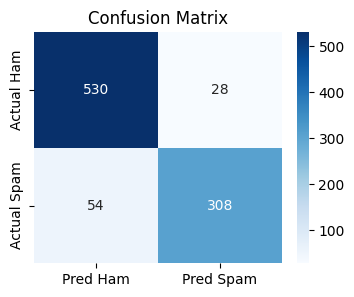

In [132]:
#Plotting the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4,3))
sns.heatmap(
    cm, 
    annot=True, 
    fmt="d", 
    cmap="Blues", 
    xticklabels=["Pred Ham","Pred Spam"],
    yticklabels=["Actual Ham","Actual Spam"]
)

plt.title("Confusion Matrix")
plt.show()

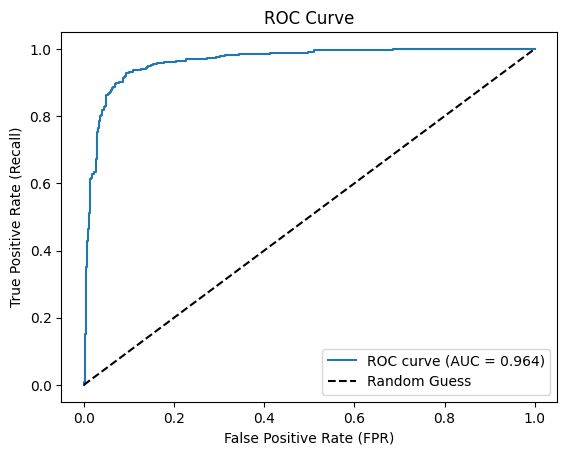

In [133]:
#Plotting the ROC curve
y_proba = grid.best_estimator_.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_proba)

auc_value = roc_auc_score(y_test, y_proba)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc_value:.3f})")
plt.plot([0,1], [0,1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()